# Исследование объявлений о продаже квартир



<div style="border:solid green 1px; padding: 10px">
Цель: выявление факторов, оказывающих влияние на цену объектов недвижимости, для построения автоматизированной системы, которая отслеживает аномалии и мошенническую деятельность

### Знакомство с данными

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
try:
    data = pd.read_csv('C:\\Users\\user\\library_jupyter\\sprint_3\\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

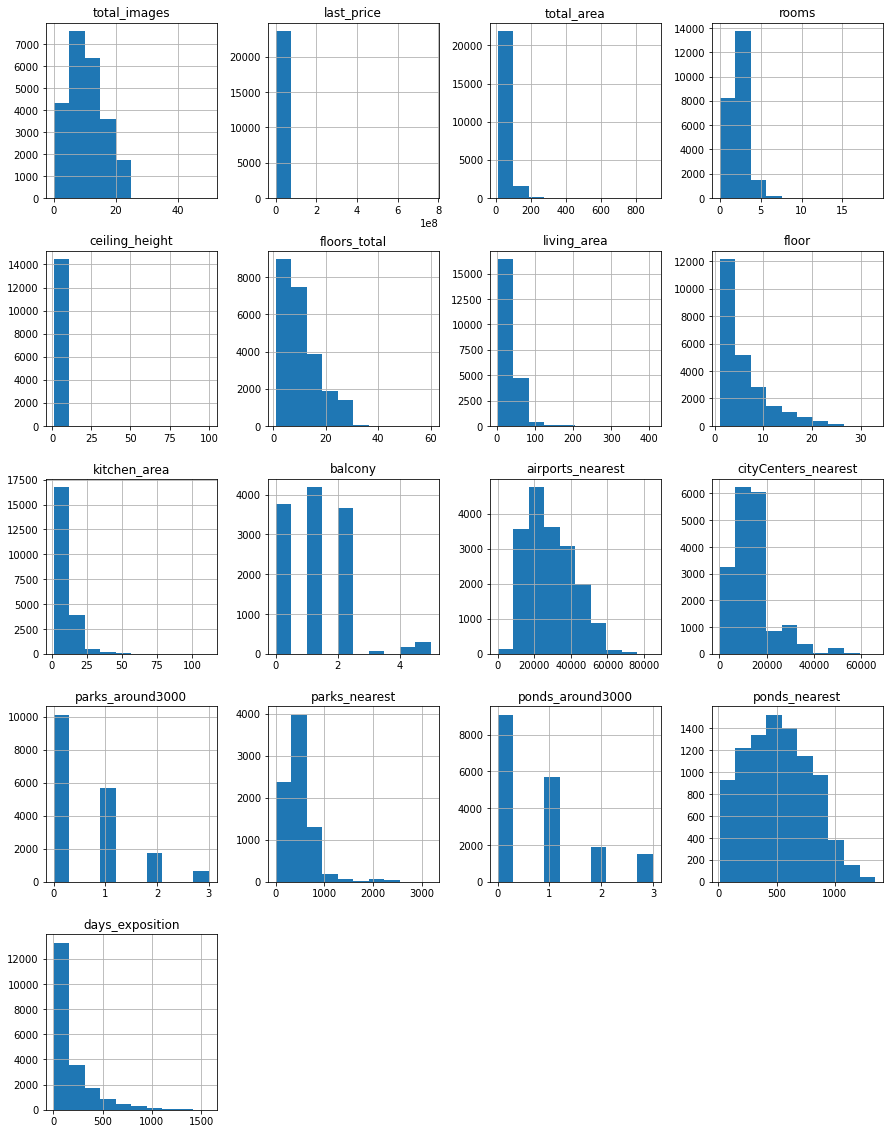

In [5]:
data.hist(figsize=(15,20));

<div style="border:solid green 1px; padding: 10px">
После первого взгляда на графики, можно сделать вывод, что в данных присутствуют анамально огромные значения, которвые выбиваются из общей средней картины<br>
Такие столбцы как цена, общая площадь, жилая площадь и площадь кухни, количество комнат явно имеют такие значение.<br>
Также далее будут изучены квартиры, с высотой потолков в 100м.<br>
В данных присутствуют пропущенные значения, а также много где тип данных - вещественный, где можно применить целочисленный. Столбец с наименованием городов необходимо проверить на наличие неявных дубликатов.

### Предобработка данных

#### Обработка пропущенных значений

<div style="border:solid green 1px; padding: 10px">
    Выявление количества пропусков и процентного соотношения к общему числу:

In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [7]:
data.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

<div style="border:solid green 1px; padding: 10px">
Пропусков в столбце is_apartment - 88%, для анализа этот столбец не понадобится

In [8]:
data = data.drop('is_apartment',axis=1) # удаление столбца is_apartment

<div style="border:solid green 1px; padding: 10px">
Пропуски в столбце parks_nearest и ponds_nearest стоят, когда в столбцах parks_around3000 и ponds_around3000 стоят значения 0.0 или NaN. Вероятнее всего, в столбцах parks_around3000 и ponds_around3000, значение NaN стоит, когда рядом с недвижимостью нет парков или водоемов. 

Далее заменим в этих 4 столбцах значения на 0.0

In [9]:
# Количество строк, где в столбцах про наличие водоемов - 0.0 или NaN, 
# показывает, что это значение равно количеству пропусков в столбце ponds_nearest
len(data.query('ponds_around3000 == 0.0')) + len(data[data['ponds_around3000'].isna()])

14589

In [10]:
# Количество строк, где в столбцах про наличие парков - 0.0 или NaN, 
# это значение практически равно количеству пропусков в столбце ponds_nearest
len(data.query('parks_around3000 == 0.0')) + len(data[data['parks_around3000'].isna()])

15624

<div style="border:solid green 1px; padding: 10px">
Пустые столбцы в balcony вероятнее всего связаны с их отсутствием, заменим значения на 0.0

In [11]:
parks_ponds = ['parks_around3000','ponds_around3000','parks_nearest','ponds_nearest','balcony']
for data_parks_ponds in parks_ponds:
    data[data_parks_ponds] = data[data_parks_ponds].fillna(0.0)

<div style="border:solid green 1px; padding: 10px">
Отсутствующих данные в ceiling_height, заменим это значение любым значением в пределах межквартильного размаха. Также видно, что межквартильный размах составляет 30 см и большинство недвижимости имеют примерно одинаковую высоту потолков.

In [12]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
import random as rd
data['ceiling_height'] = data['ceiling_height'].fillna(
    rd.uniform(
        data['ceiling_height'].describe()['25%']
        ,data['ceiling_height'].describe()['75%']
    ).round(1)
)


<div style="border:solid green 1px; padding: 10px">
После заполнения пропусков, данные практически не изменились.<br>Медианное значение было 2.65, стало 2.70.<br>Среднее значение было 2.77, стало 2.74.

In [14]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.782557
std          0.986621
min          1.000000
25%          2.600000
50%          2.800000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<div style="border:solid green 1px; padding: 10px">
Также следует передать ответственным за выгрузку, информацию, что по достаточно большому % геоданных, пропущены значения.<br>
Так, например, в строках, где пропущено значение в cityCenters_nearest, так же будет пропуск в cityCenters_nearest.<br>
Данные из этих 2 строк будет некорректно заполнять медианным или средними значениями. Удалять четверть данных тоже не видится целесообразным.Поэтому они оставлены в неизменном виде

In [15]:
len(
    data[(data['airports_nearest'].isna()) 
    & (data['cityCenters_nearest'].isna())]
)

5518

<div style="border:solid green 1px; padding: 10px">
В столбце days_exposition, есть пропущенные значения, что говорит о том, что квартира не продана. Пропуски в столбце не представляется возможным обработать

In [16]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div style="border:solid green 1px; padding: 10px">
kitchen_area и living_area - данных пропущено около 10 процентов, оставим эти данные в неизменном виде<br>
Также удалим строки, где в столбцах floors_total и locality_name пропущены значения

In [17]:
data = data.dropna(subset=['floors_total','locality_name']).reset_index(drop=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   studio                23565 non-null  bool   
 10  open_plan             23565 non-null  bool   
 11  kitchen_area          21343 non-null  float64
 12  balcony               23565 non-null  float64
 13  locality_name         23565 non-null  object 
 14  airports_nearest      18041 non-null  float64
 15  cityCenters_nearest

#### Изменение типа данных

<div style="border:solid green 1px; padding: 10px">
'days_exposition','ponds_nearest','ponds_around3000','parks_nearest','parks_around3000','balcony','floors_total','last_price' - изменим тип данных на int, в данных нет дробной части<br>
Количетсво дней, балконов и этажей не может быть с дробной частью<br>
Для дальнейшней работы с датой, также конвертируем ее в формат даты, время можно убрать, т.к. везде нулевые значения

In [19]:
convert_int = ['days_exposition','ponds_nearest','ponds_around3000','parks_nearest','parks_around3000','balcony','floors_total']
# конвертация в формат int
for conv in convert_int:
    data[conv] = np.floor(pd.to_numeric(data[conv],errors = 'coerce')).astype('Int64')
# конвертация в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

#### Обработка дубликатов

In [20]:
data.duplicated().sum() # явные дубликаты отсутствуют

0

<div style="border:solid green 1px; padding: 10px">
Для поиска неявных дубликатов все данные в столбца наименования локации, опущены в нижний регистр и буква "ё" заменена на "е"<br>
Также для поиска неявных значений - последнее слово наименования выносилось в начало строки, по нем происходила сортировка всех значений, чтобы было наглядно видно все неявные дубликаты, которые в дальнейшем будут заменены

In [21]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё','е') # для более детального поиска опустим значения в нижний регистр, и уберем "ё"

In [22]:
aa = sorted(data['locality_name'].unique())
c = []
for a in aa:
    d = a
    a = a.split()
    b = a[-1] + ' -------------------  \'' + d + '\''
    c.append(b)
sorted(c)

["агалатово -------------------  'деревня агалатово'",
 "александровская -------------------  'поселок александровская'",
 "алексеевка -------------------  'поселок алексеевка'",
 "аннино -------------------  'поселок аннино'",
 "аро -------------------  'деревня аро'",
 "барышево -------------------  'поселок барышево'",
 "батово -------------------  'деревня батово'",
 "бегуницы -------------------  'деревня бегуницы'",
 "бегуницы -------------------  'деревня старые бегуницы'",
 "белогорка -------------------  'деревня белогорка'",
 "белоостров -------------------  'поселок белоостров'",
 "бокситогорск -------------------  'бокситогорск'",
 "бор -------------------  'деревня бор'",
 "бор -------------------  'деревня трубников бор'",
 "бор -------------------  'деревня чудской бор'",
 "бор -------------------  'поселок городского типа красный бор'",
 "бор -------------------  'поселок пансионат зеленый бор'",
 "бор -------------------  'сосновый бор'",
 "бугры -------------------  '

In [23]:
duplicate = [['поселок станции вещево','поселок при железнодорожной станции вещево'],
['поселок гарболово','деревня гарболово'],
['поселок громово','поселок станции громово'],
['поселок зимитицы','деревня зимитицы'],
['городской поселок большая ижора','поселок городского типа большая ижора'],
['поселок калитино','деревня калитино'],
['кудрово','деревня кудрово'],
['коттеджный поселок лесное','поселок лесное'],
['городской поселок лесогорский','поселок городского типа лесогорский'],
['любань','поселок любань'],
['городской поселок мга','поселок городского типа мга'],
['мурино','поселок мурино'],
['городской поселок назия','поселок городского типа назия'],
['никольское','село никольское'],
['городской поселок павлово','поселок городского типа павлово','село павлово'],
['поселок при железнодорожной станции приветнинское','поселок станции приветнинское'],
['деревня рабитицы','поселок рабитицы'],
['городской поселок рощино','поселок городского типа рощино'],
['поселок городского типа рябово','поселок рябово'],
['городской поселок советский','поселок городского типа советский'],
['городской поселок федоровское','деревня федоровское'],
['деревня щеглово','поселок щеглово']]


In [24]:
#Замена всех неявных дубликатов
for dat in duplicate:
    data['locality_name'] = data['locality_name'].replace(dat,dat[0],regex=True)

### Добавление новых столбцов

<div style="border:solid green 1px; padding: 10px">
Для дальнейшего анализа добавлены следующие столбцы:<br>
- цена за кв.м - позволит увидеть зависимость цены от других параметров<br>
- день недели публикации - позволит увидеть, есть ли зависимость цены от дня недели публикации<br>
- месяц публикации - позволит увидеть, есть ли зависимость цены от месяца публикации<br>
- год публикации - позволит увидеть, есть ли зависимость цены от года публикации<br>
- тип этажа квартиры - позволит увидеть, есть ли зависимость цены от типа этажа<br>
- расстояние до центра в километрах - позволит вычислить зависимость цены от расстояния до центра


In [25]:
'''
Функция для записи типа этажа квартиры
1 - первый
2 - последний
3 - другой
'''


def data_floor(data):
    if (data['floors_total'] - data['floor']) == 0:
        return 2
    elif data['floor'] == 1:
        return 1
    return 3

In [26]:
data['square_m_price'] = ((data['last_price']) / data['total_area']).round(2) # цена за квадратный метр
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week # день недели публикации
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц публикации
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year # год публикации
data['type_floor'] = data.apply(data_floor, axis=1) # Тип этажа квартиры
data['center_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)


### Исследовательский анализ данных

#### Изучение параметров

In [27]:
'''Функция для построения гистограммы и диаграммы размаха
может принимать в себя:
обязательное поля: 
название столбца - data_column
размер минимального значения для построения диаграммы по оси x - min
размир максимального значения для построения диаграммы по оси x - max
необязательные поля:
размер корзин - bins
'''

def plot_show(data_column,min,max,bins=25):
    # размер диаграммы
    plt.figure(figsize=(10,5)) 
    # Построение диаграммы
    (data[data_column]
        .plot(
            kind='hist',
            bins=bins,
            histtype='step',
            linewidth=3,
            alpha=1,
            label=data_column,
        )
    )
    # заголовки для осей
    plt.xlabel(data_column)
    plt.ylabel('Количество записей')
    #
    #plt.ylim(минимум, максимум)
    plt.xlim(min, max)
    # название диаграммы
    plt.title(f'Гистограмма для {data_column}')
    # Линия среднего и медианного значений
    #plt.axhline(y=data[data_column].median(),label='Медианное значение', color='r', linestyle='--')
    #plt.axhline(y=data[data_column].mean(),label='Среднее значение', color='b')
    # легенда графика
    plt.legend()
    # включение сетки, для обеих осей
    plt.grid(True,axis='both',linestyle='--', linewidth=0.5)
    # показ графика
    plt.show()
    print('============================================================================================')
    print(data[data_column].describe())
    print('============================================================================================')
    # размер диаграммы
    plt.figure(figsize=(10,5)) 
    # построение графика
    data.boxplot(column=data_column)
    # название диаграммы
    plt.title(f'Диаграмма размаха для {data_column}')
    plt.show()

In [28]:
# функция для подсчета количества некорректных значений
def invalid_count(inv,min,max):
    print(f'Данных - {data[(data[inv] < min) | (data[inv] > max)][inv].count()} строк(и)')

<div style="border:solid green 1px; padding: 10px">
СНиП 31-01-2003 п 5.7 : " 5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м. <br>
Далее, будем считать минимально возможную:<br> 
общую площадь - 14м<br>
жилую площадь - 8м<br>
кухню - 5м<br>

<div style="border:solid green 3px; padding: 10px">

##### Общая площадь

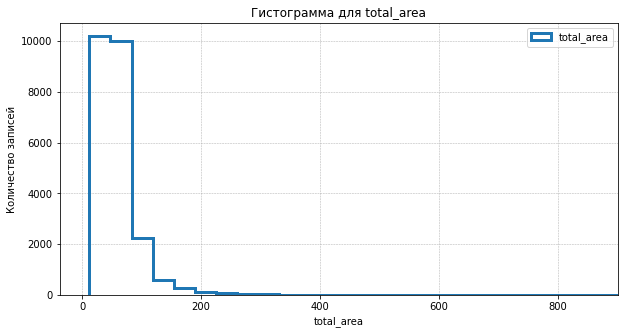

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


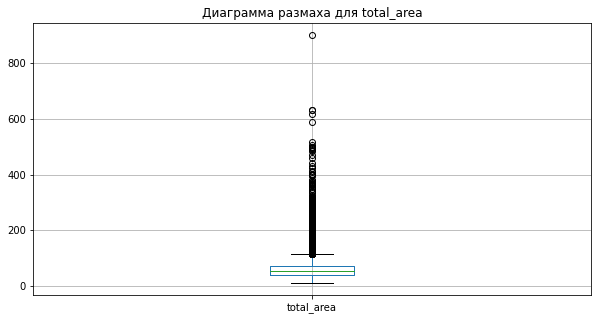

In [29]:
plot_show(
    'total_area',
    (data['total_area'].min()-50),
    data['total_area'].max()
)

<div style="border:solid green 1px; padding: 10px">
В графике не обнаружено анамалий, например, отрицательных или нулевых значений<br>
Однако для дальнейшего анализа, избавимся от данных, вне диапазона от 14м до 250м, таких данных единицы, однако своим отличие они оказывают влияние на более распрастраненные данные

In [30]:
invalid_count('total_area',14,250)

Данных - 116 строк(и)


In [31]:
data.shape

(23565, 27)

In [32]:
data = data.query('total_area >= 14 and total_area <= 250')

<div style="border:solid green 3px; padding: 10px">

##### Жилая площадь

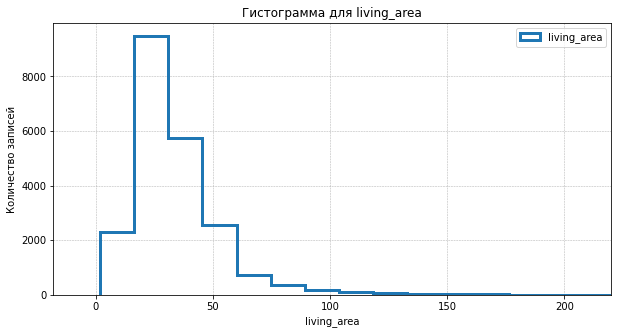

count    21605.000000
mean        33.765164
std         18.936918
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64


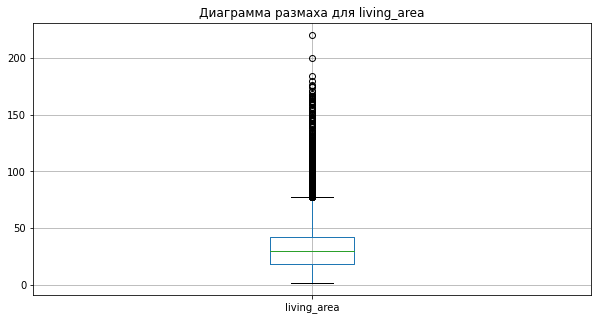

In [33]:
plot_show(
    'living_area',
    (data['living_area'].min()-20),
    data['living_area'].max(),
    bins=15
)

<div style="border:solid green 1px; padding: 10px">
В графике не обнаружено анамалий, например, отрицательных или нулевых значений<br>
Однако для дальнейшего анализа, избавимся от данных, вне диапазона от 8м до 250м, таких данных единицы, однако своим отличие они оказывают влияние на более распрастраненные данные

In [34]:
invalid_count('living_area',8,300)

Данных - 8 строк(и)


In [35]:
data.shape

(23449, 27)

In [36]:
data = data[(data['living_area'] >= 8) & (data['living_area'] <= 250) | (data['living_area'].isna())]

<div style="border:solid green 3px; padding: 10px">

##### Площадь кухни

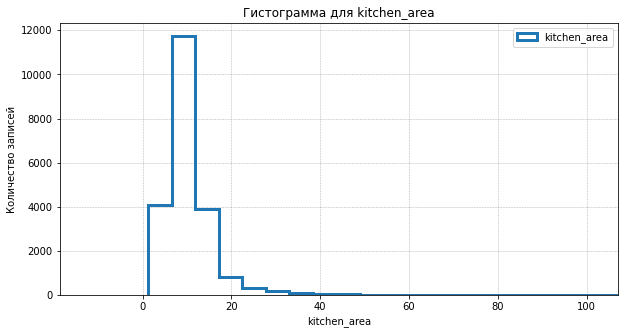

count    21243.000000
mean        10.454979
std          5.559012
min          1.300000
25%          7.000000
50%          9.080000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


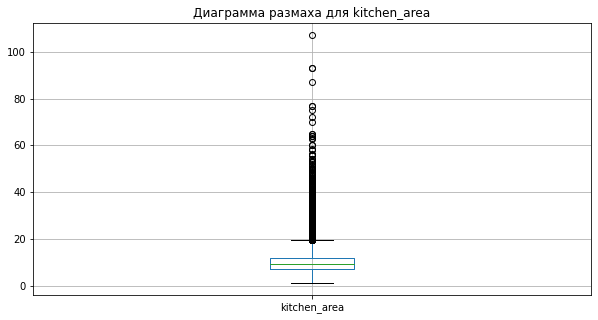

In [37]:
plot_show(
    'kitchen_area',
    (data['kitchen_area'].min()-20),
    data['kitchen_area'].max(),
    bins=20
)

<div style="border:solid green 1px; padding: 10px">
В графике не обнаружено анамалий, например, отрицательных или нулевых значений<br>
Однако для дальнейшего анализа, избавимся от данных, вне диапазона от 5м до 130м, таких данных единицы, однако своим отличие они оказывают влияние на более распрастраненные данные

In [38]:
invalid_count('kitchen_area',5,300)

Данных - 104 строк(и)


In [39]:
data.shape

(23441, 27)

In [40]:
data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 130) | (data['kitchen_area'].isna())]

<div style="border:solid green 3px; padding: 10px">

##### Цена объекта


<div style="border:solid green 1px; padding: 10px">
Добавим столбец, который будет показывать цену в миллионах.<br>
Это значение будет использовано для построения гистограммы и диаграммы размаха

In [41]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,day_publication,month_publication,year_publication,type_floor,center_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482,2,755,<NA>,120370.37,3,3,2019,3,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.80,11,18.6,1,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,0,0,0,81,82920.79,1,12,2018,1,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.80,5,34.3,4,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90,2,574,558,92785.71,3,8,2015,3,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.80,14,NaN,9,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84,3,234,424,408176.10,4,7,2015,3,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112,1,48,121,100000.00,1,6,2018,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796,3,381,<NA>,72490.85,1,3,2017,3,4.0
23561,14,3100000.0,59.00,2018-01-15,3,2.80,5,38.0,4,False,False,8.50,0,тосно,NaN,NaN,0,0,0,0,45,52542.37,0,1,2018,3,NaN
23562,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,False,False,NaN,0,село рождествено,NaN,NaN,0,0,0,0,<NA>,44091.71,6,2,2018,1,NaN
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173,3,196,602,149511.40,1,3,2017,3,10.0


In [42]:
data['last_price_mln'] = (data['last_price'] / 1000000).round(3)

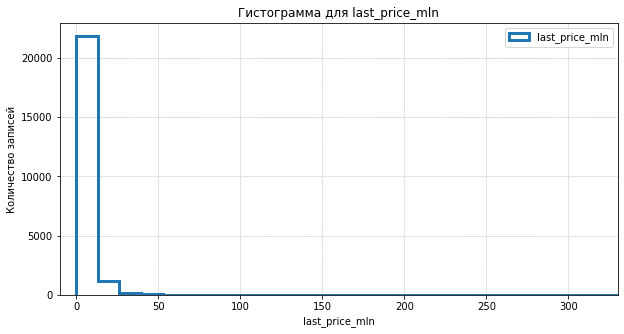

count    23337.000000
mean         6.203180
std          7.071394
min          0.012000
25%          3.430000
50%          4.630000
75%          6.736000
max        330.000000
Name: last_price_mln, dtype: float64


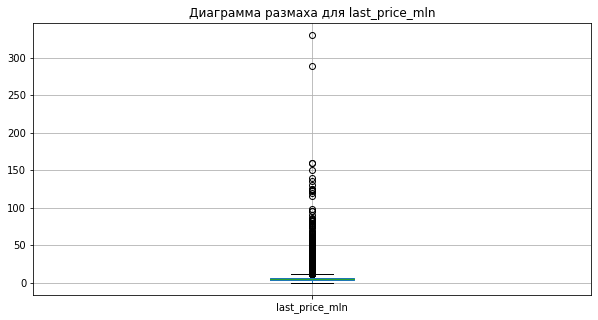

In [43]:
plot_show(
    'last_price_mln',
    (data['last_price_mln'].min()-10),
    data['last_price_mln'].max()
)

<div style="border:solid green 1px; padding: 10px">
По данным видно, что есть отдельные точечные значения, которые стоят более 250 млн, и также есть группа значений, примерно между 100 млн - 170 млн.<br>
Данные ниже 100 млн не были тронуты, вполне нормально устанавливать высокие цены, в зависимсоти от различных факторов, например ремонта, местоположения, элитности района<br>


In [44]:
invalid_count('last_price_mln',0.012,100)

Данных - 14 строк(и)


In [45]:
data.shape

(23337, 28)

In [46]:
data = data[(data['last_price_mln'] >= 0.012) & (data['last_price_mln'] <= 100)]

<div style="border:solid green 3px; padding: 10px">

##### Количество комнат

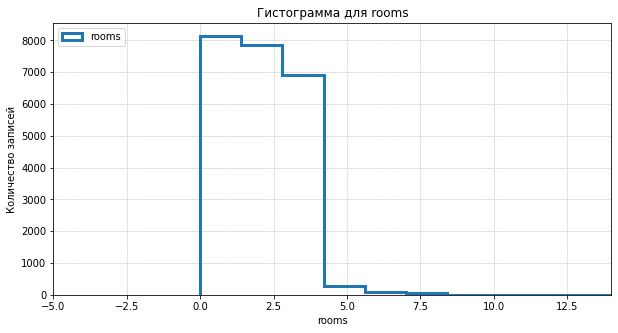

count    23323.000000
mean         2.052309
std          1.027747
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64


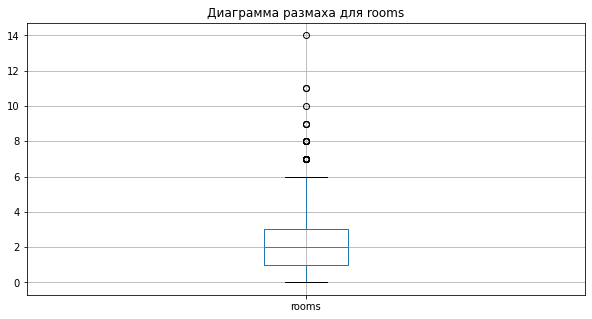

In [47]:
plot_show(
    'rooms',
    (data['rooms'].min()-5),
    data['rooms'].max(),
    bins=10
)

<div style="border:solid green 1px; padding: 10px">
Просмотрев записи, с 7 или более комнатами, признаков анамалий нет<br>
Данные с более 10 комнатам отсеим
Также изучив данные с 0 комнат, не все из них являются студией - предположим, что это все таки студия, и пользователи ошиблись при размещении объявления<br>

In [48]:
data.query('rooms >= 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,day_publication,month_publication,year_publication,type_floor,center_nearest_km,last_price_mln
645,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,13.3,0,санкт-петербург,23606.0,3148.0,0,0,0,0,<NA>,95264.02,6,7,2018,2,3.0,17.500
677,20,24900000.0,249.0,2015-08-13,7,2.80,5,180.0,4,False,False,NaN,1,санкт-петербург,24810.0,6108.0,0,0,0,0,781,100000.00,3,8,2015,3,6.0,24.900
746,9,29500000.0,188.8,2017-03-04,7,2.70,2,119.3,1,False,False,10.2,0,санкт-петербург,20965.0,814.0,0,0,2,267,246,156250.00,5,3,2017,1,1.0,29.500
809,7,16500000.0,229.0,2016-02-25,8,2.80,6,160.0,5,False,False,25.0,0,санкт-петербург,23968.0,4536.0,1,243,0,0,806,72052.40,3,2,2016,3,5.0,16.500
851,18,15000000.0,134.0,2017-10-27,7,2.80,4,88.0,3,False,False,12.0,0,санкт-петербург,22670.0,3936.0,1,803,1,387,150,111940.30,4,10,2017,3,4.0,15.000
1807,0,15000000.0,179.0,2017-04-09,7,2.80,5,126.4,5,False,False,20.9,0,санкт-петербург,20070.0,3186.0,1,104,1,803,15,83798.88,6,4,2017,2,3.0,15.000
1936,20,16000000.0,184.4,2018-10-21,7,2.80,6,125.7,5,False,False,23.1,0,санкт-петербург,23382.0,2923.0,1,525,1,791,109,86767.90,6,10,2018,3,3.0,16.000
2031,3,13520000.0,162.8,2018-03-21,7,3.00,4,121.6,4,False,False,15.9,0,санкт-петербург,20631.0,1899.0,3,360,3,153,<NA>,83046.68,2,3,2018,2,2.0,13.520
2253,15,17800000.0,164.0,2019-02-12,7,2.80,7,125.9,7,False,False,12.0,0,санкт-петербург,20139.0,2670.0,2,41,3,397,<NA>,108536.59,1,2,2019,2,3.0,17.800
2453,18,7900000.0,201.5,2018-08-17,7,2.80,2,NaN,2,False,False,NaN,0,поселок парголово,54990.0,20665.0,0,0,0,0,35,39205.96,4,8,2018,2,21.0,7.900


In [49]:
data.query('rooms < 1 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,day_publication,month_publication,year_publication,type_floor,center_nearest_km,last_price_mln
347,4,2320000.0,25.00,2017-09-27,0,2.80,14,17.0,1,False,True,NaN,0,кудрово,NaN,NaN,0,0,0,0,45,92800.00,2,9,2017,1,NaN,2.320
505,0,3375000.0,34.40,2017-03-28,0,2.80,26,24.3,19,False,True,NaN,1,поселок парголово,53115.0,19292.0,0,0,1,593,430,98110.47,1,3,2017,3,19.0,3.375
776,9,2600000.0,26.10,2018-02-20,0,2.80,18,NaN,8,False,True,NaN,1,мурино,NaN,NaN,0,0,0,0,45,99616.86,1,2,2018,3,NaN,2.600
835,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.0,3,False,True,NaN,1,поселок новый свет,NaN,NaN,0,0,0,0,7,54285.71,4,4,2017,3,NaN,1.900
942,5,2200000.0,23.00,2016-09-27,0,2.80,27,18.0,7,False,True,NaN,2,мурино,NaN,NaN,0,0,0,0,483,95652.17,1,9,2016,3,NaN,2.200
1569,0,2200000.0,22.00,2017-11-03,0,2.80,18,15.0,16,False,True,NaN,1,кудрово,NaN,NaN,0,0,0,0,81,100000.00,4,11,2017,3,NaN,2.200
1620,7,1980000.0,23.98,2018-02-01,0,2.80,4,10.5,3,False,True,NaN,1,поселок станции корнево,NaN,NaN,0,0,0,0,120,82568.81,3,2,2018,3,NaN,1.980
2523,5,3500000.0,27.10,2018-02-01,0,2.80,18,18.7,9,False,True,NaN,2,санкт-петербург,32036.0,8175.0,0,0,1,644,70,129151.29,3,2,2018,3,8.0,3.500
3006,18,2100000.0,24.00,2017-11-10,0,2.80,10,18.0,6,False,True,NaN,2,сертолово,NaN,NaN,0,0,0,0,5,87500.00,4,11,2017,3,NaN,2.100
4097,7,2600000.0,24.00,2018-02-01,0,2.80,25,18.0,4,False,True,NaN,2,санкт-петербург,10031.0,13330.0,1,915,0,0,42,108333.33,3,2,2018,3,13.0,2.600


In [50]:
invalid_count('rooms',0,9)

Данных - 4 строк(и)


In [51]:
data.shape

(23323, 28)

In [52]:
# установка типа "студия" для квартир с 0 комнатами и отсиевание данных для записей с более 9 комнат
data.loc[(data['rooms'] < 1) & (data['studio'] == False),'studio'] = True
data = data.query('rooms <= 9').reset_index(drop=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<div style="border:solid green 3px; padding: 10px">

##### Высота потолков

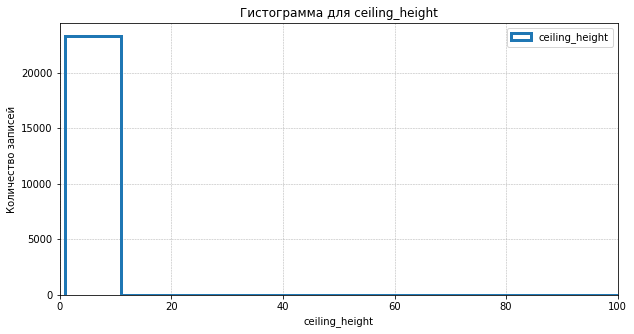

count    23319.000000
mean         2.780153
std          0.992716
min          1.000000
25%          2.600000
50%          2.800000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


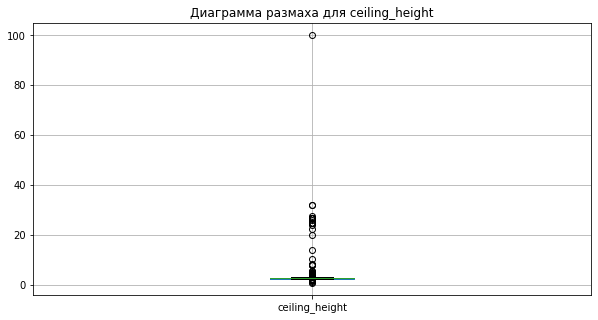

In [53]:
plot_show(
    'ceiling_height',
    (data['ceiling_height'].min()-1),
    data['ceiling_height'].max(),
    bins=10
)

<div style="border:solid green 1px; padding: 10px">
По данным видно, что есть как и очень низкие потолки, менее 2 метров, также есть много данных, более 4,5 метров, которые вероятнее всего являются ошибочными, и в дальнейшем анализе учавствовать не будут<br>
<br>


In [54]:
invalid_count('ceiling_height',2,4.5)

Данных - 38 строк(и)


In [55]:
data.shape

(23319, 28)

In [56]:
data.query('ceiling_height < 2 or ceiling_height > 4.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,day_publication,month_publication,year_publication,type_floor,center_nearest_km,last_price_mln
350,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.0,2,False,False,NaN,2,гатчина,NaN,NaN,0,0,0,0,259,65217.39,3,7,2018,3,NaN,3.600
1037,13,550000.0,29.0,2018-02-01,1,5.00,3,NaN,1,False,False,NaN,0,бокситогорск,NaN,NaN,0,0,0,0,6,18965.52,3,2,2018,1,NaN,0.550
2759,7,14950000.0,50.0,2016-03-06,2,4.80,3,30.0,2,False,False,10.00,0,санкт-петербург,24433.0,1725.0,1,589,3,161,160,299000.00,6,3,2016,3,2.0,14.950
3099,14,2900000.0,75.0,2018-11-12,3,32.00,3,53.0,2,False,False,8.00,0,волхов,NaN,NaN,0,0,0,0,<NA>,38666.67,0,11,2018,3,NaN,2.900
3419,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.3,2,False,False,7.30,0,деревня нурма,NaN,NaN,0,0,0,0,125,46666.67,4,3,2018,3,NaN,1.400
4575,0,4300000.0,45.0,2018-02-01,2,25.00,9,30.0,2,False,False,7.00,1,санкт-петербург,12016.0,13256.0,1,658,1,331,181,95555.56,3,2,2018,3,13.0,4.300
4804,7,3000000.0,25.0,2017-09-27,0,27.00,25,17.0,17,True,True,NaN,2,мурино,NaN,NaN,0,0,0,0,28,120000.00,2,9,2017,3,NaN,3.000
5000,0,3850000.0,30.5,2018-10-03,1,24.00,5,19.5,1,False,False,5.50,0,санкт-петербург,29686.0,8389.0,3,397,1,578,7,126229.51,2,10,2018,1,8.0,3.850
5167,0,2500000.0,54.0,2017-10-13,2,27.00,5,30.0,3,False,False,9.00,2,деревня мины,NaN,NaN,0,0,0,0,540,46296.30,4,10,2017,3,NaN,2.500
5584,4,4400000.0,50.0,2017-08-08,2,26.00,9,21.3,3,False,False,7.00,2,санкт-петербург,28981.0,10912.0,1,305,0,0,267,88000.00,1,8,2017,3,11.0,4.400


In [57]:
data = data.query('ceiling_height >= 2 and ceiling_height <= 4.5')

<div style="border:solid green 3px; padding: 10px">

##### Тип этажа квартиры

In [58]:
data_sns = data.groupby('type_floor')['type_floor'].count()

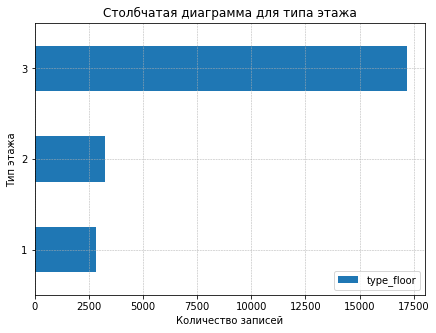

Процентное соотношение


type_floor
1    12.22
2    14.05
3    73.73
Name: type_floor, dtype: float64

In [59]:

    # размер диаграммы
    plt.figure(figsize=(7,5)) 
    # Построение диаграммы
    data_sns.plot(kind='barh')
    # заголовки для осей
    plt.xlabel('Количество записей')
    plt.ylabel('Тип этажа')
    # название диаграммы
    plt.title(f'Столбчатая диаграмма для типа этажа')
    # легенда графика
    plt.legend()
    # включение сетки, для обеих осей
    plt.grid(True,axis='both',linestyle='--', linewidth=0.5)
    # показ графика
    plt.show()
    # Процентное соотношение
print('===========================================================================')
print('Процентное соотношение')   
print('===========================================================================')
(data_sns / data['type_floor'].count() * 100).round(2)

<div style="border:solid green 1px; padding: 10px">
Четверть данных квартир приходятся на тип этажа, отличный от первого или последнего<br>
Квартир же, находящихся на 1 или последнем этаже, приблизительно равное количество<br>


<div style="border:solid green 3px; padding: 10px">

##### Общее количество этажей в доме

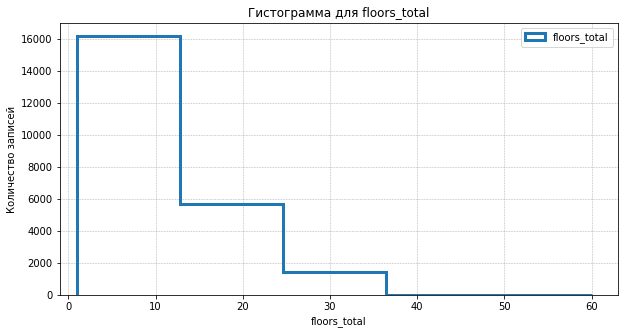

count    23281.000000
mean        10.713071
std          6.591047
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


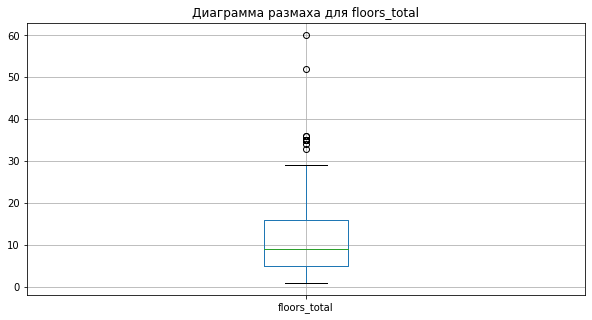

In [60]:
plot_show(
    'floors_total',
    (data['floors_total'].min()-2),
    data['floors_total'].max()+3,
    bins=5
)

<div style="border:solid green 1px; padding: 10px">
Данные, у домов которых более 30 этажей (значения, более межквартильного размаха * 1,5), не учавствуют в дальнейшем анализе, по причине, что экстремальные значения будут влиять на исследовательский анализ<br>
<br>


In [61]:
invalid_count('floors_total',1,30)

Данных - 30 строк(и)


In [62]:
data.shape

(23281, 28)

In [63]:
with pd.option_context('display.max_columns', None):
    print(data.query('floors_total > 30'))

       total_images  last_price  total_area first_day_exposition  rooms  \
392              15   5990000.0        54.0           2018-03-22      2   
857              14   7777777.0        75.0           2017-11-16      2   
1044             10   5200000.0        50.0           2015-11-06      2   
1673             11   3550000.0        28.0           2018-02-08      1   
1889             13  10150000.0        74.0           2017-11-17      2   
2220             12   3800000.0        45.5           2018-06-28      2   
2921              9   4300000.0        37.0           2017-08-08      1   
4783             12   5500000.0        50.0           2017-06-22      1   
5663             20   3590000.0        25.0           2017-08-30      0   
5721             12   4590000.0        43.0           2018-10-19      1   
7128             10   4599000.0        42.0           2019-01-10      1   
8368             20   7500000.0        73.3           2017-05-18      3   
9046              7   650

In [64]:
data = data.query(' floors_total < 30')

<div style="border:solid green 3px; padding: 10px">

##### Расстояние до центра города в метрах

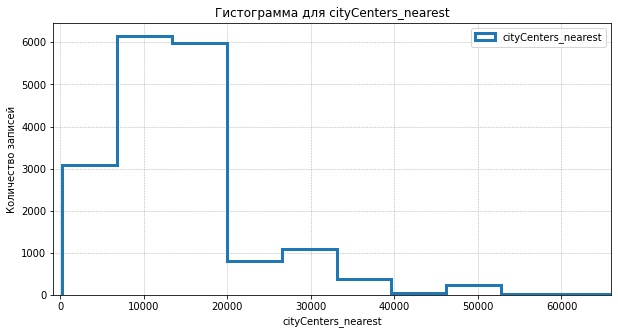

count    17800.000000
mean     14226.493315
std       8575.630168
min        181.000000
25%       9350.000000
50%      13135.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


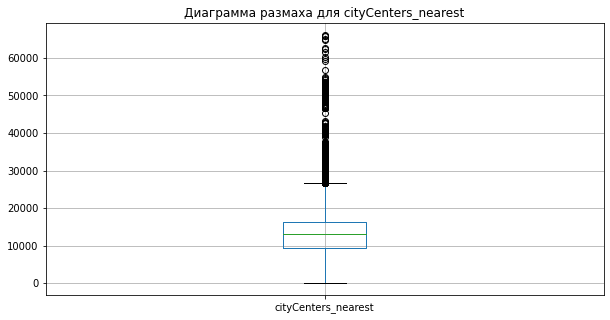

In [65]:
plot_show(
    'cityCenters_nearest',
    (data['cityCenters_nearest'].min()-1000),
    data['cityCenters_nearest'].max(),
    bins=10
)

<div style="border:solid green 1px; padding: 10px">
На первый взгляд может показаться, что на диаграмме размаха много выбросов<br>
Однако это не анамалии и данные остануться для дальнейшего анализа<br>


In [66]:
invalid_count('cityCenters_nearest',0,40000)

Данных - 289 строк(и)


In [67]:
data.shape

(23251, 28)

In [68]:
# количество объявлений в городах, которые находятся в 40 км от центра
data.query('cityCenters_nearest > 40000').groupby('locality_name')['locality_name'].count()

locality_name
зеленогорск            23
красное село            7
кронштадт              90
ломоносов             120
петергоф               38
поселок молодежное      5
поселок репино          4
сестрорецк              2
Name: locality_name, dtype: int64

<div style="border:solid green 3px; padding: 10px">

##### Расстояние до ближайшего парка

<div style="border:solid green 1px; padding: 10px">
Изначально, в данных было очень много пропущенных значений, в столбце расстояний до ближайшего парка<br>
Если отобрать значения, которые были заполнены, и проанализировать их, то в среднем - у большинства домов парк находится в радиусе километра<br>


In [69]:
data_nearest = data.query('parks_nearest != 0')

<AxesSubplot:>

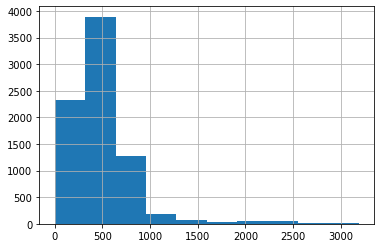

In [70]:
data_nearest['parks_nearest'].hist()

<div style="border:solid green 1px; padding: 10px">
15354 строки имеют значение 0, т.е. вероятнее всего, в радиусе 3 км у этих домов парков нет<br>
Данный столбец не подходит для анализа из-за недостатка данных

In [71]:
invalid_count('parks_nearest',1,40000)

Данных - 15354 строк(и)


#### Время продажи квартир

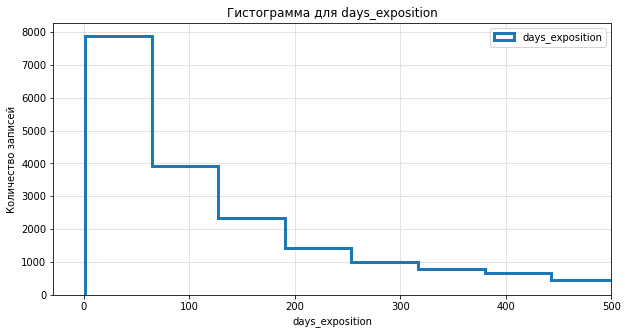

count    20134.000000
mean       180.301033
std        219.296436
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64


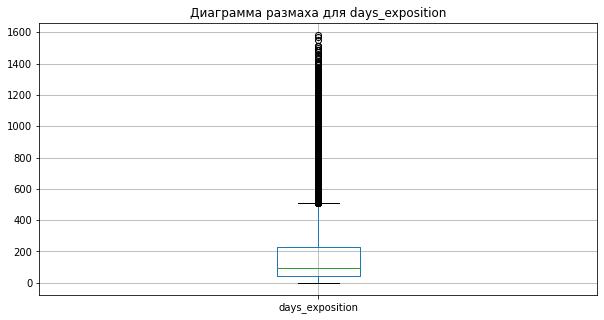

In [72]:
plot_show(
    'days_exposition',
    (data['days_exposition'].min()-30),
    #data['days_exposition'].max(),
    500,
    bins=25
)

<div style="border:solid green 1px; padding: 10px">
По диаграмме наглядно видно 2 пика, от 0 до 60 дней и от 125 до 190 дней, далее, количество идет на спад<br>
В среднем, объявление о продаже висит где то около 120 дней<br>
По диаграмме размаха:<br>
    - быстрой продажей можно считать ту, которая состоялась в первые 2 месяца, с момента размещения объявления<br>
    - необычно долгой, продажи, которые висят более 400 дней с момента размещения объявления<br>



#### Факторы влияния на цену

<div style="border:solid green 1px; padding: 10px">
По таблице корреляции и графикам видно, что со значением цены, средне коррелируют значения общей площади квартиры, кухонного помещения и жилой площади<br>
Наиболее коррелирует - значение общей площади<br>


In [73]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,day_publication,month_publication,year_publication,type_floor,center_nearest_km,last_price_mln
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482,2,755,<NA>,120370.37,3,3,2019,3,16.0,13.000
1,7,3350000.0,40.40,2018-12-04,1,2.80,11,18.6,1,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,0,0,0,81,82920.79,1,12,2018,1,19.0,3.350
2,10,5196000.0,56.00,2015-08-20,2,2.80,5,34.3,4,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90,2,574,558,92785.71,3,8,2015,3,14.0,5.196
3,0,64900000.0,159.00,2015-07-24,3,2.80,14,NaN,9,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84,3,234,424,408176.10,4,7,2015,3,7.0,64.900
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112,1,48,121,100000.00,1,6,2018,3,8.0,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23314,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796,3,381,<NA>,72490.85,1,3,2017,3,4.0,9.700
23315,14,3100000.0,59.00,2018-01-15,3,2.80,5,38.0,4,False,False,8.50,0,тосно,NaN,NaN,0,0,0,0,45,52542.37,0,1,2018,3,NaN,3.100
23316,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,False,False,NaN,0,село рождествено,NaN,NaN,0,0,0,0,<NA>,44091.71,6,2,2018,1,NaN,2.500
23317,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173,3,196,602,149511.40,1,3,2017,3,10.0,11.475


total_area - 0.74
living_area - 0.65
kitchen_area - 0.58


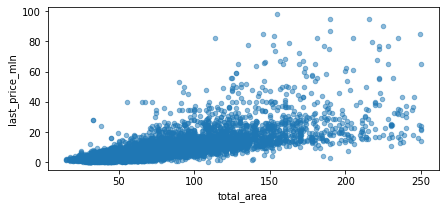

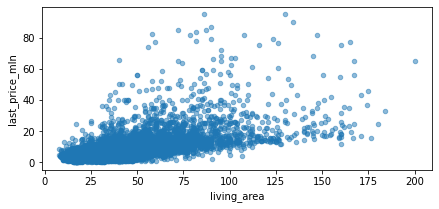

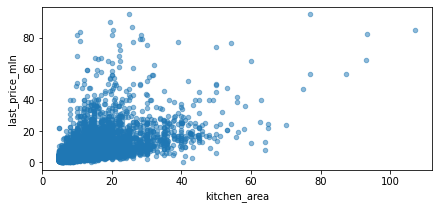

In [74]:
num_value = ['total_area','living_area','kitchen_area']
for num in num_value:
    value = data['last_price'].corr(data[num]).round(2)
    print(f'{num} - {value}')
    data.plot(y='last_price_mln', x=num, kind='scatter', alpha = 0.5,figsize=(7,3)) 

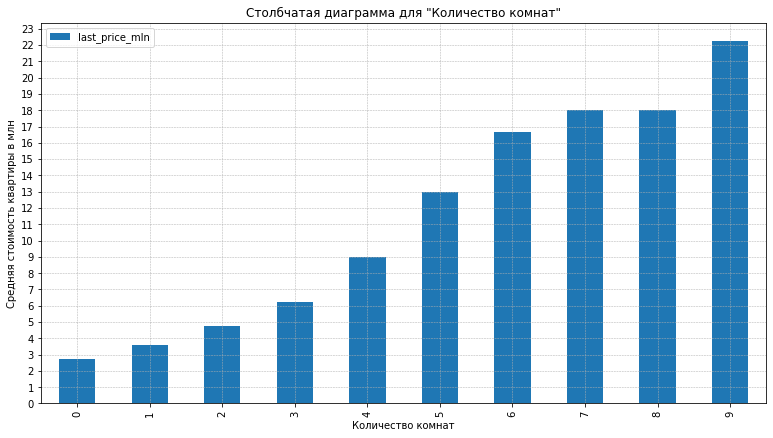

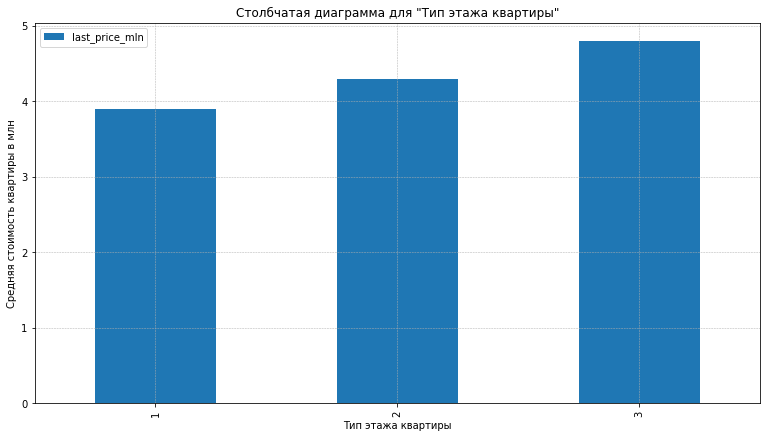

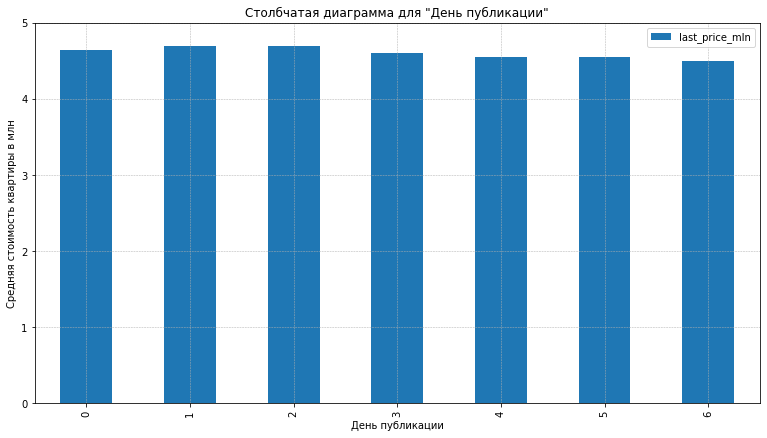

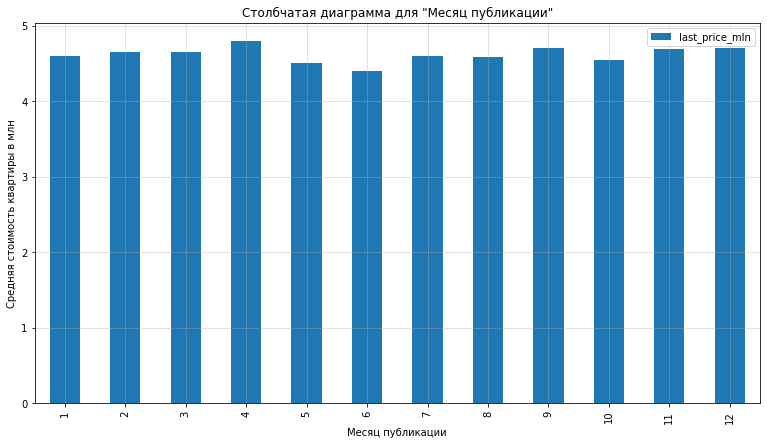

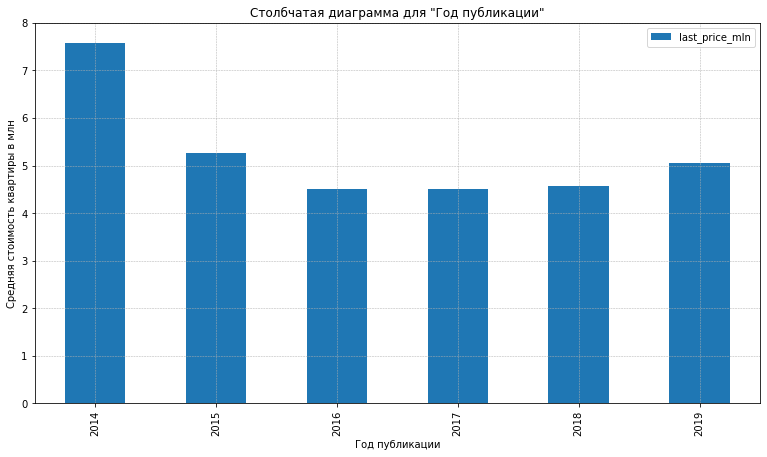

In [75]:
value_bar = ['rooms','type_floor','day_publication','month_publication','year_publication']
name_column = ['Количество комнат', 'Тип этажа квартиры','День публикации','Месяц публикации','Год публикации']

col = 0
for val in value_bar:
    # Настройка размера фигуры
    plt.figure(figsize=(13, 7))
    median_value_category = data.groupby(val)['last_price_mln'].median()
    median_value_category.plot(kind='bar')
    # Построение столбчатой диаграммы с использованием данных из Dataframe 
    #sns.barplot(data=median_value_category,y='last_price_mln',x=val)
    # заголовки для осей
    plt.xlabel(name_column[col])
    plt.ylabel('Средняя стоимость квартиры в млн')
    # название диаграммы
    plt.title(f'Столбчатая диаграмма для "{name_column[col]}"')
    plt.legend()
     # включение сетки, для обеих осей
    plt.grid(True,axis='both',linestyle='--', linewidth=0.5)
    plt.yticks(np.arange(0, max(median_value_category)+1, 1.0))
    plt.show()
    col += 1

<div style="border:solid green 1px; padding: 10px">
Хоть корреляция и иллюстрирует зависимость между величинами, она не доказывает наличие причинно-следственной связи<br>
Однако, можно утверждать, что 1 из основных факторов, который оказывает влияние на цену - это количество квадратных метров в квартире и тут есть причинно-следственная связь<br>
Верным будет считать, что количество комнат тоже влияет на цену. По графику видно, как увеличивается среднее значение цены, с увеличением количества комнат в квартире.<br>
Для остальных столбцов - слабо выражена какая-либо зависимость.<br>
Можно предположить, что в 2014 году было событие, в связи с которым продавалось больше дорогостоящих квартир. Для других годов, значения приблизително равны и нет выраженных скачков

#### Цена квадратуры в зависимости от популярности региона

In [76]:
def my_mean(x): return (x.mean()).round(2)

In [77]:
data_top_10 = data.groupby('locality_name')['square_m_price'].agg(['count',my_mean]).sort_values(by='count',ascending=False).head(10)
data_top_10

,count,my_mean
locality_name,,
санкт-петербург,15411,113354.23
мурино,579,85894.20
кудрово,470,95260.85
поселок шушары,438,78513.33
всеволожск,398,68654.47
пушкин,364,103193.63
колпино,337,75333.30
поселок парголово,327,90175.91
гатчина,301,68858.48


<div style="border:solid green 1px; padding: 10px">
Регион, с наиболее дорогим жильем - как ни странно, Санкт-Петербург. Перспективный и развитый город, с множеством возможностей и зарплатой более высокой, чем в меньших регионах. Отсюда и складывается цена<br>
С наименьшей средней ценой - Выборг. Жилье тут дешевле, расстояние до Санкт-Петербурга, около 140 КМ. В сравнении с тем же Мурино и Кудрово, находящимися ближе к центру, разница колоссальная<br>
Чем дальше находится регион, тем, как правило, ниже будет цена за квадратный метр


#### Зависимость цены от расстояния до центра

<div style="border:solid green 1px; padding: 10px">
Расчет медианного значения для региона Санкт-Петербург, в зависимости от удаления от центра по километрам


In [78]:
data_dep_on_price = (
    data
    .query('locality_name == "санкт-петербург"')
    .groupby('center_nearest_km')['square_m_price']
    .agg(['count','median'])
    .sort_index()
)
data_dep_on_price

,count,median
center_nearest_km,,
0.0,26,164074.500
1.0,177,126760.560
2.0,298,121135.095
3.0,339,108139.530
4.0,670,117541.805
5.0,881,126785.710
6.0,591,129915.400
7.0,410,126226.360
8.0,586,122564.835


<div style="border:solid green 1px; padding: 10px">
На 27 километре всего 2 записи, к тому же они выбиваются из среднего значения. Далее эти значения следует удалить и не включать их в общий график

In [79]:
data = data.query('center_nearest_km != 27 or locality_name not in ("санкт-петербург")')
data_dep_on_price = (
    data
    .query('locality_name == "санкт-петербург"')
    .groupby('center_nearest_km')['square_m_price']
    .agg(['count','median'])
    .sort_index()
)

'''
Почему то, при прогонки проекта тут, а не локально, при использовании sns.barplot, когда в качестве аргумента "x" 
я передаю столбец с индексами center_nearest_km, вылезает ошибка :((
'''
data_dep_on_price['index_double'] = data_dep_on_price.index

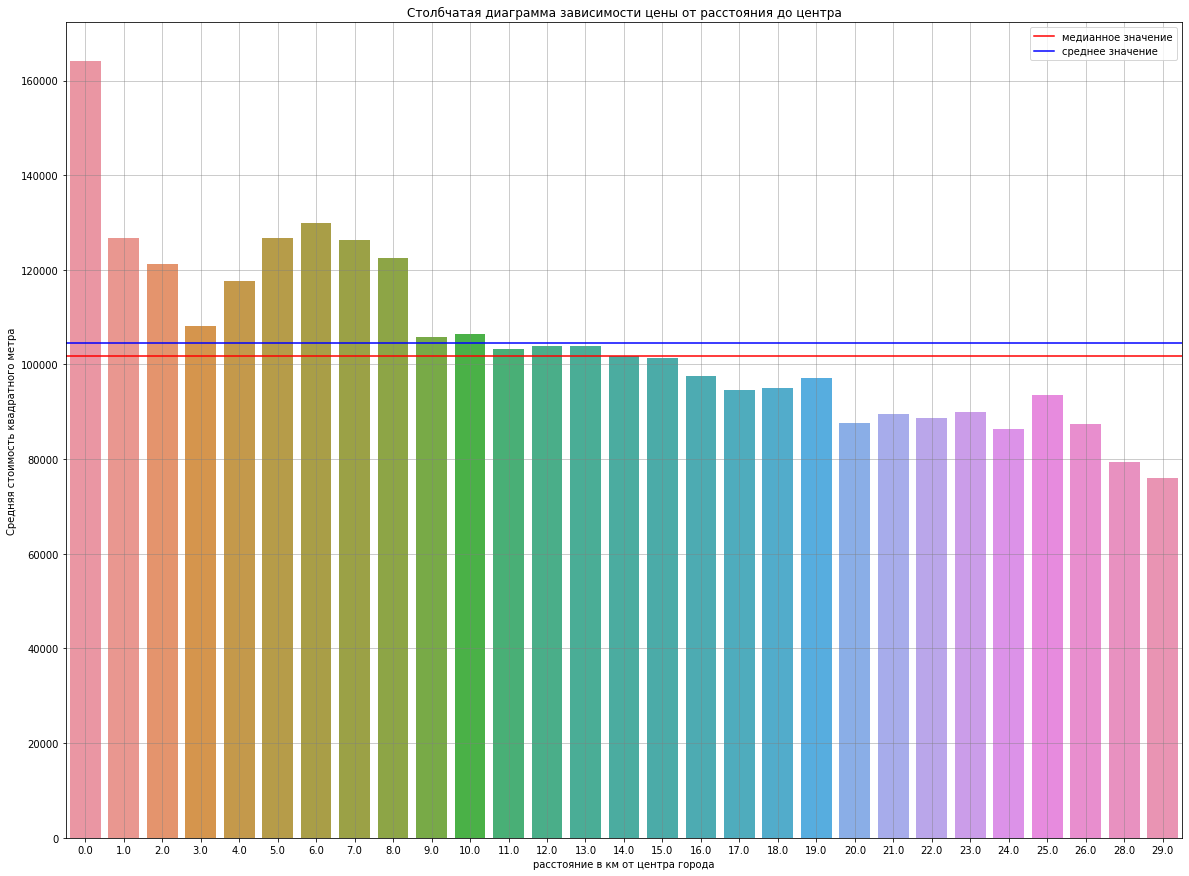

In [80]:
# Вычисление медианы и среднего значения выручки
med = float(data_dep_on_price['median'].median()) 
avg = float(data_dep_on_price['median'].mean())
# Настройка размера фигуры
plt.figure(figsize=(20, 15))
# Построение столбчатой диаграммы с использованием данных из Dataframe 
sns.barplot(data=data_dep_on_price,x='index_double', y='median')
# Установка заголовка графика
plt.title('Столбчатая диаграмма зависимости цены от расстояния до центра')
#Добавление подписи для оси у 
plt.ylabel('Средняя стоимость квадратного метра')
# Добавление порииси аля оси Х
plt.xlabel('расстояние в км от центра города')
# Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
plt.grid(color='grey', axis='both', alpha=0.5)
# Добавление горизонтальной линии для медианного значения с красным цветом и пунктирной линией 
plt.axhline(y=med, label='медианное значение', color='r', linestyle='-')
# Добавление горизонтальной линии для среднего значения с синим цветом
plt.axhline (y=avg, label='среднее значение', color='b')
# Отображение легенды для горизонтальных линий
plt.legend()
# Показ графика
plt.show()

<div style="border:solid green 1px; padding: 10px">
Наглядно видно, как по ходу удаления от центра - снижается<br>
Так, начиная от 6 километра от центра, все значения идут на спад, на 0 километре больше всего находится дорогих объявлений<br>
Можно сказать, что определенно зависимость расстояния от цены - есть


### Исследование

<div style="border:solid green 2px; padding: 10px">
Генеральной целью проекта было выявление факторов, оказывающих влияние на цену объектов недвижимости, для построения автоматизированной системы, которая отслеживает аномалии и мошенническую деятельность
По итогам анализа на полученных данных, можно сказать, что в крупном городе Санкт-Петербурге, наиболее высокие цены на недвижимость, чем в ближайших городах. И чем дальше этот город находится от мегаполиса, тем ниже там будет цена на квадратный метр. Так, в городе выборг - цены на недвижимость примерно в 2 раза дешевле, чем в Санкт-Петербурге.<br>
Если рассматривать сам Санкт-Петербург, в нем тоже есть отношение цены от удаленности до центра города:
- средняя цена за квадратный метр квартир, находящихся в пределах 10 км - составляет более 105 тыс. за квадратный метр
- средняя цена за квадратный метр квартир, находящихся от 10 км - составляет менее 105 тыс. за квадратный метр<br>
Также, на итоговую цену имеет влияние количество квадратных метров в квартире, и количество комнат - отношение количества квадратных метров к цене, около 75%. Чем выше цена, тем больше в ней будет квадратных метров.<br>
<br>
Для построения автоматизированной системы, определяющей аномалии или мошеннеческую деятельность, следует учитывать следующие основные отношения:
- цены от расстояния<br>
- цены от количества квадратных метров<br>
Можно проверять объявления, которые висят на площадке более 400 дней, на наличие анамалий и мошеннеческой деятельности. Как правило - большинство объявлений висит менее 400 дней.<br>
<br>
К сожалению, данные изначально были представлены не в полном объеме, и не удалось выявить дополнительные факторы, которые в той или иной мере могут влиять на цену. следует сделать корректную выгрузку геоданных.<br>
Также в данных были обработаны, на сколько было возможно, пропущенные значения. Удалены неявные дубликаты, которые могли значительно исказить данные. Так например, не обработав "кудрово", оно бы не попало в топ 10 популярных по объявлениям регионов. 

In [81]:
data_delete = 23699 - data['total_images'].count()
print(f'Итого удалено анамальных значений:{(data_delete / 23699).round(3)}%')

Итого удалено анамальных значений:0.019%
